##Casusopdracht 1
De eerste verkenning heeft als doel om bekend te raken met de dataset. Hiervoor gaan jullie een eerste iteratie van stappen 1 en 2 van CRISP-DM uitvoeren. Dat zijn:

1. Data Understanding met Data collection en Data exploration & analysis
2. Data Preparation met Data cleaning en Data processing (ook wel data munging genoemd)
<br>
<br>

### Opdrachtomschrijving

Lever een Jupyter Notebook in met de volgende onderdelen:

- Een eerste verkenning en analyse van je dataset:
  - Kies een aantal featurevariabelen die interessant lijken, de targetvariabele is gegeven
    - Bepaal of het afhankelijke of onafhankelijke variabelen zijn
    - Bepaal de meetniveau's van deze variabelen, dat is nuttige informatie bij de modelkeuze
  - Voer een analyse uit voor deze featurevariabelen en de targetvariabele
    - Denk hierbij aan het gebruiken van centrum- en spreidingsmaten, het bepalen van outliers, etc.
- Een eerste versie van de data preparation:
  - Schoon de dataset op voor deze variabelen zodanig dat deze geschikt is als input voor een model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\koens\AppData\Local\Temp\ipykernel_44792\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
db = pd.read_csv("movie.csv")

In [3]:
db.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
db.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

We moeten de omzet weten van de films dus we willen de `gross` kolom gebruiken als target variabele

In [5]:
target = db["gross"]

In [6]:
db[["movie_title", "actor_3_name", "actor_2_name", "actor_1_name"]].head(20)

,movie_title,actor_3_name,actor_2_name,actor_1_name
0,Avatar,Wes Studi,Joel David Moore,CCH Pounder
1,Pirates of the Caribbean: At World's End,Jack Davenport,Orlando Bloom,Johnny Depp
2,Spectre,Stephanie Sigman,Rory Kinnear,Christoph Waltz
3,The Dark Knight Rises,Joseph Gordon-Levitt,Christian Bale,Tom Hardy
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Rob Walker,Doug Walker
5,John Carter,Polly Walker,Samantha Morton,Daryl Sabara
6,Spider-Man 3,Kirsten Dunst,James Franco,J.K. Simmons
7,Tangled,M.C. Gainey,Donna Murphy,Brad Garrett
8,Avengers: Age of Ultron,Scarlett Johansson,Robert Downey Jr.,Chris Hemsworth
9,Harry Potter and the Half-Blood Prince,Rupert Grint,Daniel Radcliffe,Alan Rickman


In [7]:
db.select_dtypes(include=['int', 'float']).dropna().corr()["gross"]


num_critic_for_reviews       0.468535
duration                     0.244743
director_facebook_likes      0.139938
actor_3_facebook_likes       0.301584
actor_1_facebook_likes       0.147045
gross                        1.000000
num_voted_users              0.626948
cast_total_facebook_likes    0.238687
facenumber_in_poster        -0.032254
num_user_for_reviews         0.547107
budget                       0.100389
title_year                   0.052368
actor_2_facebook_likes       0.254659
imdb_score                   0.212124
aspect_ratio                 0.065260
movie_facebook_likes         0.368494
Name: gross, dtype: float64

In [8]:
interesting = db[["gross", "actor_1_name", "budget", "imdb_score", "plot_keywords", "num_critic_for_reviews", "num_voted_users", "num_user_for_reviews", "movie_facebook_likes", "content_rating", "language", "country"]]

In [9]:
interesting.isna().sum()

gross                     884
actor_1_name                7
budget                    492
imdb_score                  0
plot_keywords             153
num_critic_for_reviews     50
num_voted_users             0
num_user_for_reviews       21
movie_facebook_likes        0
content_rating            303
language                   14
country                     5
dtype: int64

In [10]:
len(interesting.index)

5043

De features die NaN waardes bevatten zijn niet in te vullen met standaard waardes dus we halen deze rijen uit de data.

In [11]:
nonna_interesting = interesting.dropna()
nonna_interesting.isna().sum()

gross                     0
actor_1_name              0
budget                    0
imdb_score                0
plot_keywords             0
num_critic_for_reviews    0
num_voted_users           0
num_user_for_reviews      0
movie_facebook_likes      0
content_rating            0
language                  0
country                   0
dtype: int64

In [12]:
len(nonna_interesting.index)

3815

we zien hier dat er iets meer dan 1200 rijen hierdoor verwijderd waarvan 884 sowiso wegmoeten vanwege dat de "gross" kolom een NaN waarde heeft.

<Axes: xlabel='gross', ylabel='Count'>

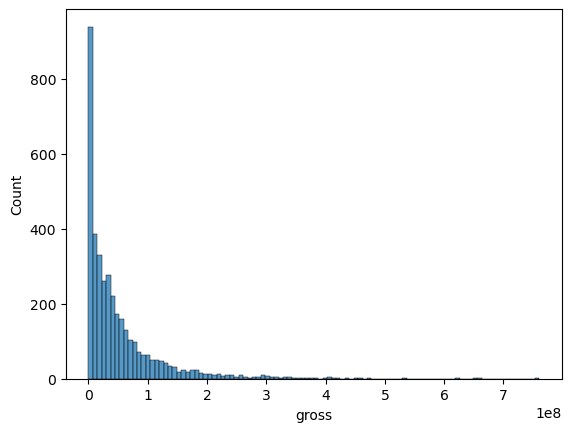

In [13]:
sns.histplot(nonna_interesting["gross"])

In [22]:
for column in nonna_interesting.columns:
    print(f"{column}:")
    print(f"{nonna_interesting[column].dtypes}\n")


gross:
float64

actor_1_name:
object

budget:
float64

imdb_score:
float64

plot_keywords:
object

num_critic_for_reviews:
float64

num_voted_users:
int64

num_user_for_reviews:
float64

movie_facebook_likes:
int64

content_rating:
object

language:
object

country:
object

